Iris Flowers Classification ML Project :
Beginer Task -1


Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris

Name : Pranjali Devendra Desai

In [ ]:

import numpy as np                   #For Scientific Calculation 
import pandas as pd                  #For Data Manipulation
import matplotlib.pyplot as plt      #For Data Visualization
import seaborn as sns                #For Data Visualization

In [ ]:
col_names =  ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_dataset = "/content/iris.data"
df = pd.read_csv(iris_dataset, names = col_names)

In [ ]:

# displaying first 5 rows of the Dataset 
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:

# displaying last 5 rows of the Dataset 
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:

data_size = df.shape
print(f"Number of Rows : {data_size[0]}") 
print(f"Number of Columns : {data_size[1]}")

Number of Rows : 150
Number of Columns : 5


In [ ]:
df.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
species          object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:

df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

In [ ]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
unique_species = df['species'].unique()
unique_species = unique_species.tolist()
unique_species

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
species_count = df['species'].value_counts()
count = species_count.tolist()
species_count.to_frame()

,species
Iris-virginica,50
Iris-setosa,50
Iris-versicolor,50


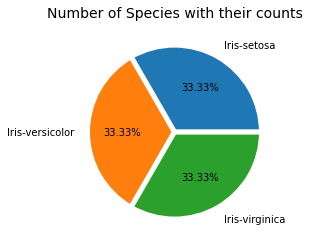

In [ ]:

plt.pie(count, labels = unique_species, labeldistance = 1.15, wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'}, autopct = "%1.2f%%")
plt.title("Number of Species with their counts", fontsize = 14)
plt.show()

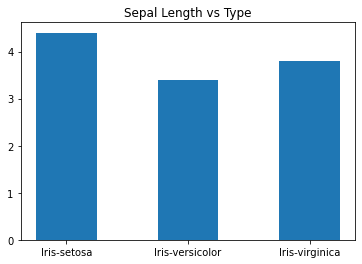

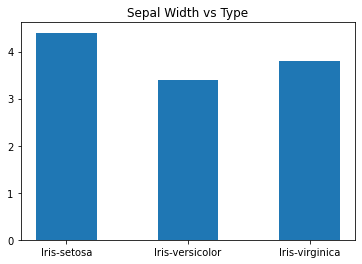

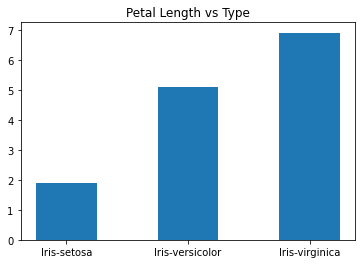

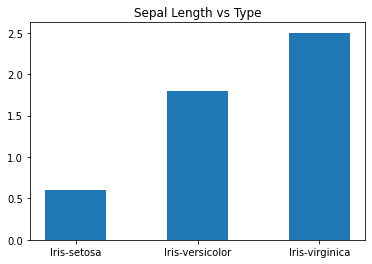

In [ ]:
# Sepal Length vs Type
plt.bar(df['species'],df['sepal-width'], width = 0.5) 
plt.title("Sepal Length vs Type")
plt.show()

# Sepal Width vs Type
plt.bar(df['species'],df['sepal-width'], width = 0.5) 
plt.title("Sepal Width vs Type")
plt.show()

# Petal Length vs Type
plt.bar(df['species'],df['petal-length'], width = 0.5) 
plt.title("Petal Length vs Type")
plt.show()

# Petal Width vs Type
plt.bar(df['species'],df['petal-width'], width = 0.5) 
plt.title("Sepal Length vs Type")
plt.show()

In [ ]:

from sklearn import preprocessing

In [ ]:
X = df.iloc[:, 0:4]
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y = df['species']
Y = Y.values
Y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(X,Y, test_size = 0.3, random_state = 1)
print("x_train :" + str(x_train.shape))
print("x_test :" + str(x_test.shape))
print("y_train :" + str(y_train.shape))
print("y_test :" + str(y_test.shape))

x_train :(105, 4)
x_test :(45, 4)
y_train :(105,)
y_test :(45,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

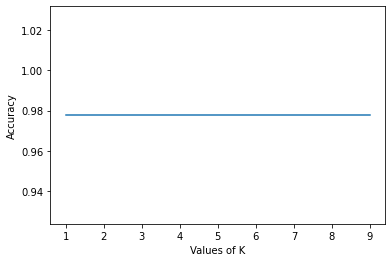

From above line plot, the model giving maximum accuracy for the K = 1


In [ ]:
best_k = 0
best_acc = 0.0
acc_arr = np.zeros((9,))

for k in range(1,10):
    # model creation and prediction on X2
    knn_temp = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    y2_result = knn_temp.predict(x_test)
    
    # calculating accuracy of model
    acc_score = accuracy_score(y_test, y2_result)
    acc_arr[k-1] = acc_score
    
    if acc_score > best_acc:
        best_k = k
        knn = knn_temp
        best_acc = acc_score
        
plt.plot(range(1,10),acc_arr)
plt.xlabel("Values of K")
plt.ylabel("Accuracy")
plt.show()

print("From above line plot, the model giving maximum accuracy for the K =",best_k)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(x_train, y_train)
y_pred =  knn.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [ ]:
acc =  accuracy_score(y_pred, y_test)
print("Accuracy of the created KNN model is " + str(acc*100) +"%")

Accuracy of the created KNN model is 97.77777777777777%


In [ ]:
cmat = confusion_matrix(y_test, y_pred)
values = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cmat_eval = pd.DataFrame(cmat, columns = values, index = values)
cmat_eval

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,14,0,0
Iris-versicolor,0,18,0
Iris-virginica,0,1,12
